<a href="https://colab.research.google.com/github/Samytoro/Ejercicios-Fundamentos-Python/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [10]:
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('heart', name)

heart heart.csv


In [11]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [12]:
print(df.shape)

(303, 14)


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

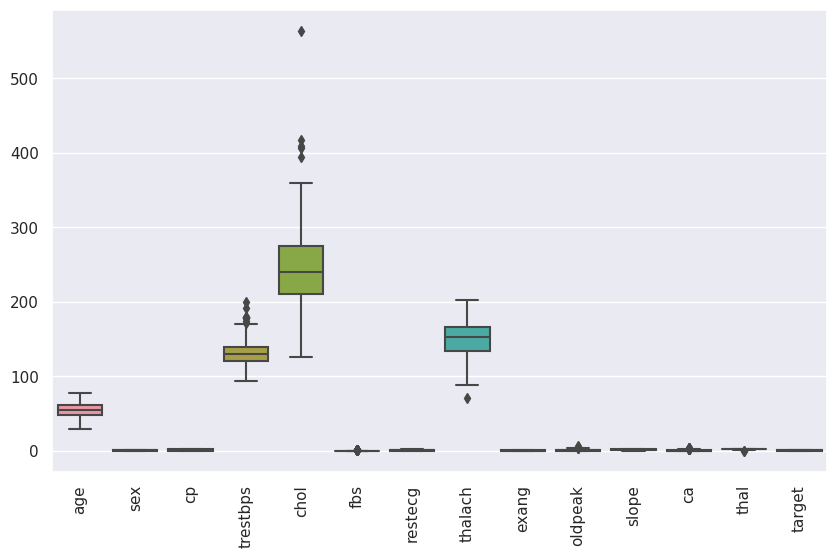

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [16]:
df.target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


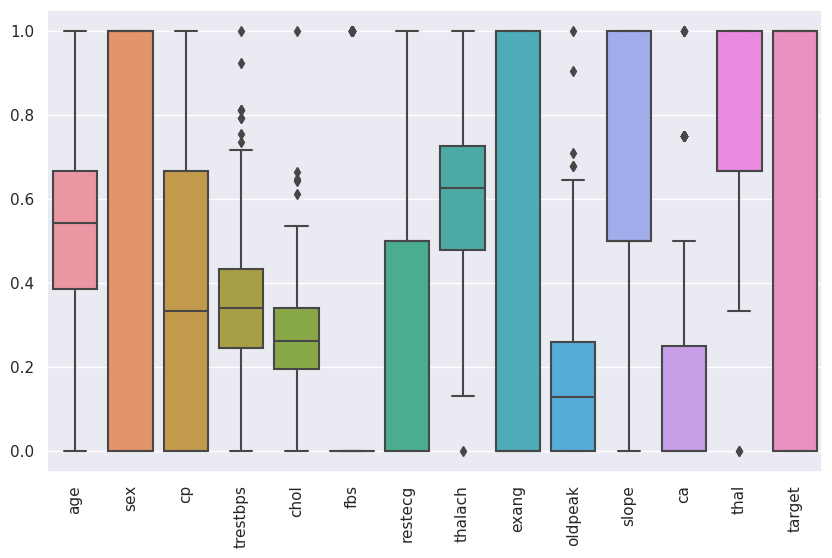

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90);

<ipython-input-20-eef84e7ff8f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

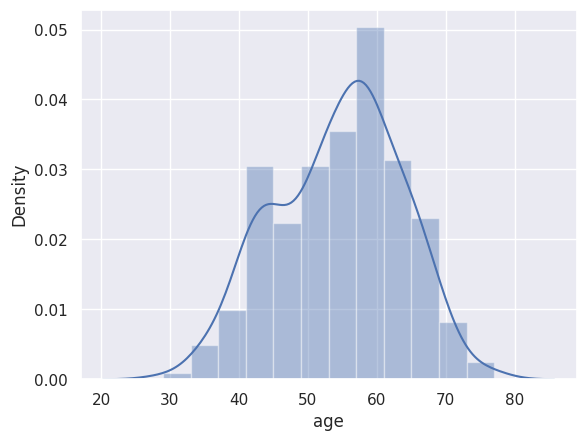

In [20]:
sns.distplot(df["age"])

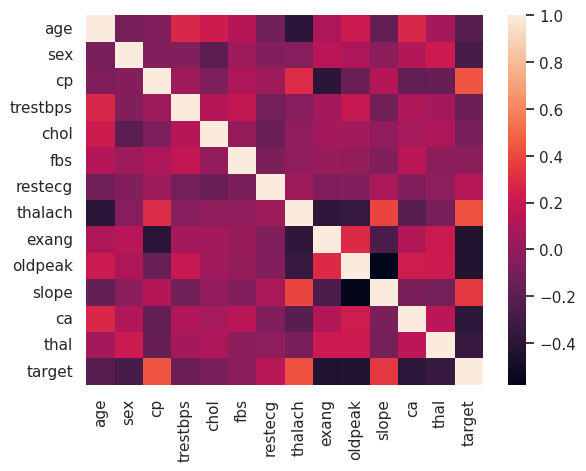

In [21]:
g = df.corr()
df_ = g.index
g = sns.heatmap(df[df_].corr())

In [22]:
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#esta  bien? #Si

((212, 13), (91, 13), (212,), (91,))

In [24]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

1.0

In [25]:
print(classification_report(y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



In [26]:
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]

In [27]:
def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]

In [28]:
def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]

In [29]:
def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]

In [30]:
def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

In [31]:
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [32]:
import sklearn.metrics as metrics
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

In [33]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [34]:
acc = []
roc = []

In [35]:
# Primer Modelo - Naive Bayes
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

Naive Bayes : 
Accuracy: 0.8021978021978022
F1 score: 0.8200000000000001
Recall: 0.8723404255319149
Precision: 0.7735849056603774

 confussion matrix:
 [[32 12]
 [ 6 41]]


In [37]:
# Segundo Modelo - Regresión logística
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2.score(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Logistic Regression : 
Accuracy: 0.8131868131868132
F1 score: 0.8282828282828283
Recall: 0.8723404255319149
Precision: 0.7884615384615384

 confussion matrix:
 [[33 11]
 [ 6 41]]


In [39]:
# Tercer Modelo - Support Vector Machine
from sklearn.svm import SVC
model3 = SVC(gamma='auto', kernel='linear')
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

In [40]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Support Vector Machine : 
Accuracy: 0.8131868131868132
F1 score: 0.8316831683168316
Recall: 0.8936170212765957
Precision: 0.7777777777777778

 confussion matrix:
 [[32 12]
 [ 5 42]]


In [41]:
# Cuarto Modelo - KNN
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

In [42]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
K-Nearest Neighbors : 
Accuracy: 0.7032967032967034
F1 score: 0.737864077669903
Recall: 0.8085106382978723
Precision: 0.6785714285714286

 confussion matrix:
 [[26 18]
 [ 9 38]]


In [43]:
# Quinto Modelo - Random Forest
model5 = RandomForestClassifier(n_estimators=20, max_depth=10)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
y_pred_train = model5.predict(X_train)

In [44]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Random Forest : 
Accuracy: 0.8021978021978022
F1 score: 0.8200000000000001
Recall: 0.8723404255319149
Precision: 0.7735849056603774

 confussion matrix:
 [[32 12]
 [ 6 41]]


In [45]:
# Sexto Modelo - Árboles de decisión
from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model6.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Decision Tree : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Decision Tree : 
Accuracy: 0.8021978021978022
F1 score: 0.8200000000000001
Recall: 0.8723404255319149
Precision: 0.7735849056603774

 confussion matrix:
 [[32 12]
 [ 6 41]]


In [5]:
#Con base en los resultados de las métricas de calidad, los modelos de Vector Machine y  ÁRBOL DECISIONES son los más adecuados para predecir un ataque cardiaco.

In [65]:
from sklearn.svm import SVC
model3 = SVC(gamma='auto', kernel='linear')
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

In [66]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Support Vector Machine : 
Accuracy: 0.8131868131868132
F1 score: 0.8316831683168316
Recall: 0.8936170212765957
Precision: 0.7777777777777778

 confussion matrix:
 [[32 12]
 [ 5 42]]


In [67]:
y_pred = model3.predict(X_test)

In [68]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0])

In [69]:
joblib.dump(model3, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']